In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df_smoothed_v00 = pd.read_csv(r"C:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\RERUN\data\data file 2\data_1_smoothed.csv")


In [3]:
# Display basic information about the df_smoothed_v00set
df_smoothed_v00.info()

# Display column names
column_names = df_smoothed_v00.columns.tolist()
print(column_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Columns: 1578 entries, thnoth_name to 731.853
dtypes: float64(1576), object(2)
memory usage: 3.7+ MB
['thnoth_name', 'prov_char', '2996.355', '2996.837', '2997.32', '2997.802', '2998.284', '2998.766', '2999.248', '2999.73', '3000.212', '3000.694', '3001.177', '3001.659', '3002.141', '3002.623', '3003.105', '3003.587', '3004.069', '3004.551', '3005.033', '3005.516', '3005.998', '3006.48', '3006.962', '3007.444', '3007.926', '3008.408', '3008.89', '3009.372', '3009.855', '3010.337', '3010.819', '3011.301', '3011.783', '3012.265', '3012.747', '3013.229', '3013.712', '3014.194', '3014.676', '3015.158', '3015.64', '2943.323', '2943.805', '2944.287', '2944.769', '2945.251', '2945.733', '2946.215', '2946.697', '2947.179', '2947.662', '2948.144', '2948.626', '2949.108', '2949.59', '2950.072', '2950.554', '2951.036', '2951.518', '2952.001', '2952.483', '2952.965', '2953.447', '2953.929', '2954.411', '2954.893', '2955.375', 

In [4]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the target variable and feature columns
target_v00 = 'thnoth_name'
features_v00 = df_smoothed_v00.columns.difference(['thnoth_name', 'prov_char'])
X = df_smoothed_v00[features_v00].astype(float)
y = df_smoothed_v00[target_v00]
groups = df_smoothed_v00['prov_char']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PLS regression
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, y_encoded)

# Calculate VIP scores
def calculate_vip(pls, X):
    t = pls.x_scores_
    w = pls.x_weights_
    q = pls.y_loadings_
    p, h = w.shape
    vips = np.zeros(p)
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j])) ** 2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight) / total_s)
    return vips

vip_scores = calculate_vip(pls, X_scaled)

# Create a DataFrame to hold the VIP scores
vip_df = pd.DataFrame({'wavenumber': features_v00, 'VIP': vip_scores})

# Sort by VIP scores
vip_df = vip_df.sort_values(by='VIP', ascending=False)

# Display the top 10 features
top_10_features = vip_df.head(10)
print(top_10_features)


     wavenumber       VIP
40      1106.94  2.777008
41    1106.94.1  2.777008
268    1464.671  1.975681
267    1464.188  1.958143
269    1465.153  1.955319
1386   2851.238  1.953572
1385   2850.756  1.946298
1387    2851.72  1.934405
1384   2850.274  1.918318
270    1465.635  1.915234


C:\Users\pingk\AppData\Local\Temp\ipykernel_16484\568493070.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p * (s.T @ weight) / total_s)


In [6]:

# Generate the plot
plt.figure(figsize=(15, 5))
plt.bar(vip_df['wavenumber'].astype(float), vip_df['VIP'], width=5, color='green')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('VIP Score')
plt.title('VIP Scores across Wavenumbers')
plt.xlim(4000, 650)  # Set x-axis range
plt.grid(True)
plt.show()

ValueError: could not convert string to float: '1106.94.1'

<Figure size 1500x500 with 0 Axes>

In [ ]:
datax= df_smoothed_v00.copy()

In [ ]:
datax.head()

,thnoth_name,prov_char,2996.355,2996.837,2997.32,2997.802,2998.284,2998.766,2999.248,2999.73,...,727.514,727.996,728.478,728.961,729.443,729.925,730.407,730.889,731.371,731.853
0,Non-Thai,SUX,0.000696,0.000675,0.000658,0.000648,0.000647,0.000653,0.000664,0.000671,...,0.001172,0.001061,0.000964,0.000893,0.000852,0.000833,0.000819,0.000790,0.000735,0.000648
1,Non-Thai,SUX,-0.000272,-0.000274,-0.000274,-0.000273,-0.000271,-0.000267,-0.000261,-0.000254,...,0.000062,0.000089,0.000124,0.000163,0.000201,0.000231,0.000246,0.000243,0.000220,0.000183
2,Non-Thai,KTX,-0.000840,-0.000835,-0.000835,-0.000841,-0.000853,-0.000869,-0.000882,-0.000887,...,-0.001045,-0.000874,-0.000691,-0.000517,-0.000367,-0.000249,-0.000163,-0.000101,-0.000057,-0.000027
3,Non-Thai,SGR,-0.001029,-0.001003,-0.000981,-0.000968,-0.000964,-0.000967,-0.000972,-0.000973,...,-0.001168,-0.000975,-0.000783,-0.000619,-0.000500,-0.000426,-0.000381,-0.000344,-0.000294,-0.000217
4,Non-Thai,SSX,-0.000948,-0.000939,-0.000938,-0.000946,-0.000962,-0.000979,-0.000991,-0.000990,...,-0.001179,-0.001054,-0.000931,-0.000828,-0.000754,-0.000706,-0.000671,-0.000628,-0.000563,-0.000467


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


# Define the target variable and feature columns
target_v00 = 'thnoth_name'
features_v00 = datax.columns.difference(['thnoth_name', 'prov_char'])
X = datax[features_v00].astype(float)
y = datax[target_v00]
groups = datax['prov_char']


# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PLS regression
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, y_encoded)

# Calculate VIP scores
def calculate_vip(pls, X):
    t = pls.x_scores_
    w = pls.x_weights_
    q = pls.y_loadings_
    p, h = w.shape
    vips = np.zeros(p)
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j])) ** 2 for j in range(h)])
        vips[i] = np.sqrt(p * (s.T @ weight) / total_s)
    return vips

vip_scores = calculate_vip(pls, X_scaled)

# Create a DataFrame to hold the VIP scores
vip_df = pd.DataFrame({'wavenumber': features_v00, 'VIP': vip_scores})

# Sort by VIP scores
vip_df = vip_df.sort_values(by='VIP', ascending=False)

# Display the top 10 features
top_10_features = vip_df.head(10)
print(top_10_features)

# Generate the plot
plt.figure(figsize=(15, 5))
plt.bar(vip_df['wavenumber'].astype(float), vip_df['VIP'], width=5, color='green')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('VIP Score')
plt.title('VIP Scores across Wavenumbers')
plt.xlim(650, 4000)  # Set x-axis range
plt.grid(True)

# Highlight the top 10 features
top_10_wavenumbers = top_10_features['wavenumber'].astype(float)
top_10_vips = top_10_features['VIP']

plt.scatter(top_10_wavenumbers, top_10_vips, color='red')
for i, txt in enumerate(top_10_wavenumbers):
    plt.annotate(round(txt, 2), (top_10_wavenumbers.iloc[i], top_10_vips.iloc[i]))

plt.show()

C:\Users\pingk\AppData\Local\Temp\ipykernel_32588\1742847271.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vips[i] = np.sqrt(p * (s.T @ weight) / total_s)


     wavenumber       VIP
40      1106.94  2.777008
41    1106.94.1  2.777008
268    1464.671  1.975681
267    1464.188  1.958143
269    1465.153  1.955319
1386   2851.238  1.953572
1385   2850.756  1.946298
1387    2851.72  1.934405
1384   2850.274  1.918318
270    1465.635  1.915234


ValueError: could not convert string to float: '1106.94.1'

<Figure size 1500x500 with 0 Axes>

In [ ]:
data3 = df_smoothed_v00.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the target variable
target = 'thnoth_name'

# Define the features and groups
X = data3.drop(columns=['prov_char', 'thnoth_name'])
y = data3[target]
groups = data3['prov_char']

# Initialize LOGO-CV
logo = LeaveOneGroupOut()

# Initialize the classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Arrays to store results
accuracies = []
feature_importances = []

# Perform LOGO-CV
for train_idx, test_idx in logo.split(X, y, groups=groups):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    rf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    
    # Store feature importances
    feature_importances.append(rf.feature_importances_)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')

# Calculate mean feature importances
mean_feature_importances = np.mean(feature_importances, axis=0)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Save the feature importances
#feature_importance_df.to_csv('/mnt/data/feature_importances.csv', index=False)


Mean Accuracy: 0.9312043622886677


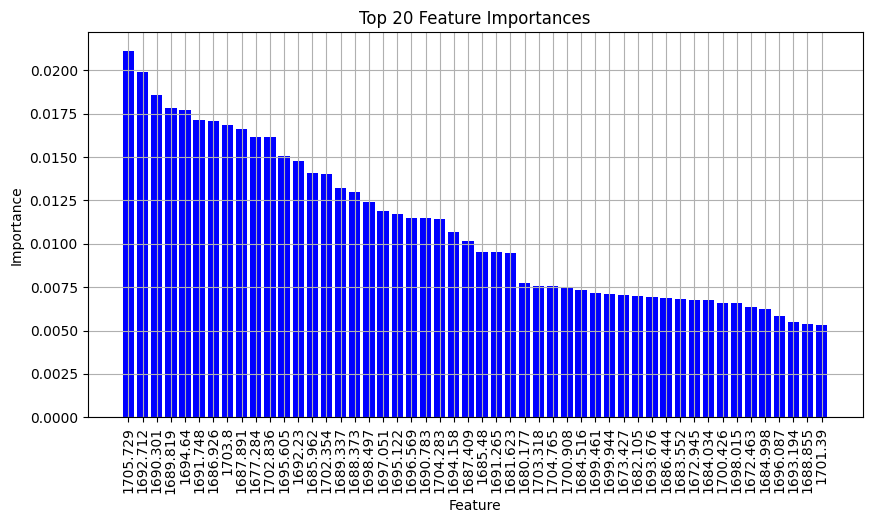

In [ ]:
# Load the feature importances
#feature_importance_df = pd.read_csv('/mnt/data/feature_importances.csv')

# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'][:50], feature_importance_df['Importance'][:50], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 50 Feature Importances')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()